# Generalization and Overfitting

---

This data set contains information of cars purchased at the Auction.
<br>
We will use this file to predict the quality of buying decisions and visualize decision processes.
<br>
<br>
VARIABLE DESCRIPTIONS:<br>
Auction: Auction provider at which the  vehicle was purchased<br>
Color: Vehicle Color<br>
IsBadBuy: Identifies if the kicked vehicle was an avoidable purchase<br>
MMRCurrentAuctionAveragePrice: Acquisition price for this vehicle in average condition as of current day<br>
Size: The size category of the vehicle (Compact, SUV, etc.)<br>
TopThreeAmericanName:Identifies if the manufacturer is one of the top three American manufacturers<br>
VehBCost: Acquisition cost paid for the vehicle at time of purchase<br>
VehicleAge: The Years elapsed since the manufacturer's year<br>
VehOdo: The vehicles odometer reading<br>
WarrantyCost: Warranty price (term=36month  and millage=36K)<br>
WheelType: The vehicle wheel type description (Alloy, Covers)<br>
<br>
Target variable: **IsBadBuy**

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

## 1.Upload and clean data

In [3]:
# Read data
car_kick = pd.read_csv("/content/drive/MyDrive/IS670_data/car_kick.csv")
car_kick

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,BYRNO,VNZIP1,VNST,IsOnlineSale,IsBadBuy
0,1289952000,2006,4,51954,6197,7062,9605,10426,5341,6351,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,99750,32124,FL,0,0
1,1242691200,2005,4,89127,3688,4783,4483,5666,3688,4783,...,2,Covers,AMERICAN,MEDIUM,FORD,20833,78754,TX,0,0
2,1248220800,2006,3,71271,6897,8449,7949,9625,6868,8549,...,1,Alloy,AMERICAN,LARGE,GM,22916,80011,CO,0,0
3,1285718400,2008,2,83338,7878,8925,11723,13026,7801,8704,...,2,Covers,AMERICAN,LARGE,GM,23657,94544,CA,0,0
4,1237334400,2007,2,58698,8800,10091,10004,11398,7355,8543,...,1,Alloy,AMERICAN,LARGE,GM,20833,77086,TX,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,1285804800,2008,2,56072,6255,6972,9852,10567,6326,7126,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,22808,77061,TX,0,1
67207,1274918400,2004,6,94232,8359,9645,12042,13302,7505,8188,...,1,Alloy,'TOP LINE ASIAN','MEDIUM SUV',OTHER,17675,28273,NC,0,1
67208,1280448000,2004,6,79534,2805,3826,6132,6871,3106,4479,...,1,Alloy,AMERICAN,MEDIUM,GM,18880,37771,TN,0,1
67209,1285200000,2003,7,79394,4042,5296,7335,8983,3534,4732,...,2,Covers,AMERICAN,'MEDIUM SUV',GM,23657,92337,CA,0,1


In [4]:
# Select the desired columns only
desired_columns = ['Auction', 'Color', 'IsBadBuy', 'MMRCurrentAuctionAveragePrice', 'Size','TopThreeAmericanName',
'VehBCost', 'VehicleAge', 'VehOdo', 'WarrantyCost', 'WheelType']
car_kick_desired = car_kick [desired_columns]

In [5]:
# Replacing 1 with Yes and 0 with No in the target column IsBadBuy
carAuction = car_kick_desired.copy() #why?
carAuction.loc[:, 'IsBadBuy'] = carAuction['IsBadBuy'].replace({0: 'No', 1: 'Yes'})

In [6]:
# Examine variable type
carAuction.dtypes

Auction                          object
Color                            object
IsBadBuy                         object
MMRCurrentAuctionAveragePrice     int64
Size                             object
TopThreeAmericanName             object
VehBCost                          int64
VehicleAge                        int64
VehOdo                            int64
WarrantyCost                      int64
WheelType                        object
dtype: object

In [7]:
# Change categorical variables to "category"
carAuction['Auction'] = carAuction['Auction'].astype('category')
carAuction['Color'] = carAuction['Color'].astype('category')
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].astype('category')
carAuction['Size'] = carAuction['Size'].astype('category')
carAuction['TopThreeAmericanName'] = carAuction['TopThreeAmericanName'].astype('category')
carAuction['WheelType'] = carAuction['WheelType'].astype('category')

In [8]:
# Create dummy variables
carAuction = pd.get_dummies(carAuction, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'], drop_first=True)

In [9]:
# Take the target and examine the porportion of target variable for each class
target = carAuction['IsBadBuy']
print(target.value_counts(normalize=True))

IsBadBuy
No     0.904539
Yes    0.095461
Name: proportion, dtype: float64


In [10]:
# Drop the target variable and put all the predictors in a new dataframe
predictors = carAuction.drop(['IsBadBuy'],axis=1)

In [11]:
# Apply minmax normalization on predictors
min_max_scaler = preprocessing.MinMaxScaler()
predictors_normalized = pd.DataFrame(min_max_scaler.fit_transform(predictors))
predictors_normalized.columns = predictors.columns

## 2.Partition and balance the data set

In [12]:
# Partition the data
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors_normalized, target, test_size=0.1, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(60489, 38) (6722, 38) (60489,) (6722,)


In [13]:
# Taking steps to balance the train data
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'No']
minority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'Yes']

# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=5)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=5)

# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['IsBadBuy'])
target_train = balanced_data['IsBadBuy']

In [14]:
# Examine the porportion of target variable for training data set
print(target_train.value_counts(normalize=True))

IsBadBuy
No     0.5
Yes    0.5
Name: proportion, dtype: float64


In [15]:
# Examine the porportion of target variable for testing data set
print(target_test.value_counts(normalize=True))

IsBadBuy
No     0.896608
Yes    0.103392
Name: proportion, dtype: float64


## 3.Generalization and Overfitting

### Build a decision tree model with max_depth = 2

In [16]:
# Build a decision tree model on training data with max_depth = 2
model_tree1 = DecisionTreeClassifier(criterion = "entropy",random_state = 1, max_depth = 2)
model_tree1.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

[Text(0.5, 0.8333333333333334, 'VehicleAge <= 0.5\nentropy = 1.0\nsamples = 11442\nvalue = [5721, 5721]\nclass = No'),
 Text(0.25, 0.5, 'VehicleAge <= 0.389\nentropy = 0.961\nsamples = 5922\nvalue = [3650, 2272]\nclass = No'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.913\nsamples = 3358\nvalue = [2255, 1103]\nclass = No'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.994\nsamples = 2564\nvalue = [1395, 1169]\nclass = No'),
 Text(0.75, 0.5, 'VehicleAge <= 0.722\nentropy = 0.955\nsamples = 5520\nvalue = [2071, 3449]\nclass = Yes'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.98\nsamples = 3789\nvalue = [1583, 2206]\nclass = Yes'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.858\nsamples = 1731\nvalue = [488, 1243]\nclass = Yes')]

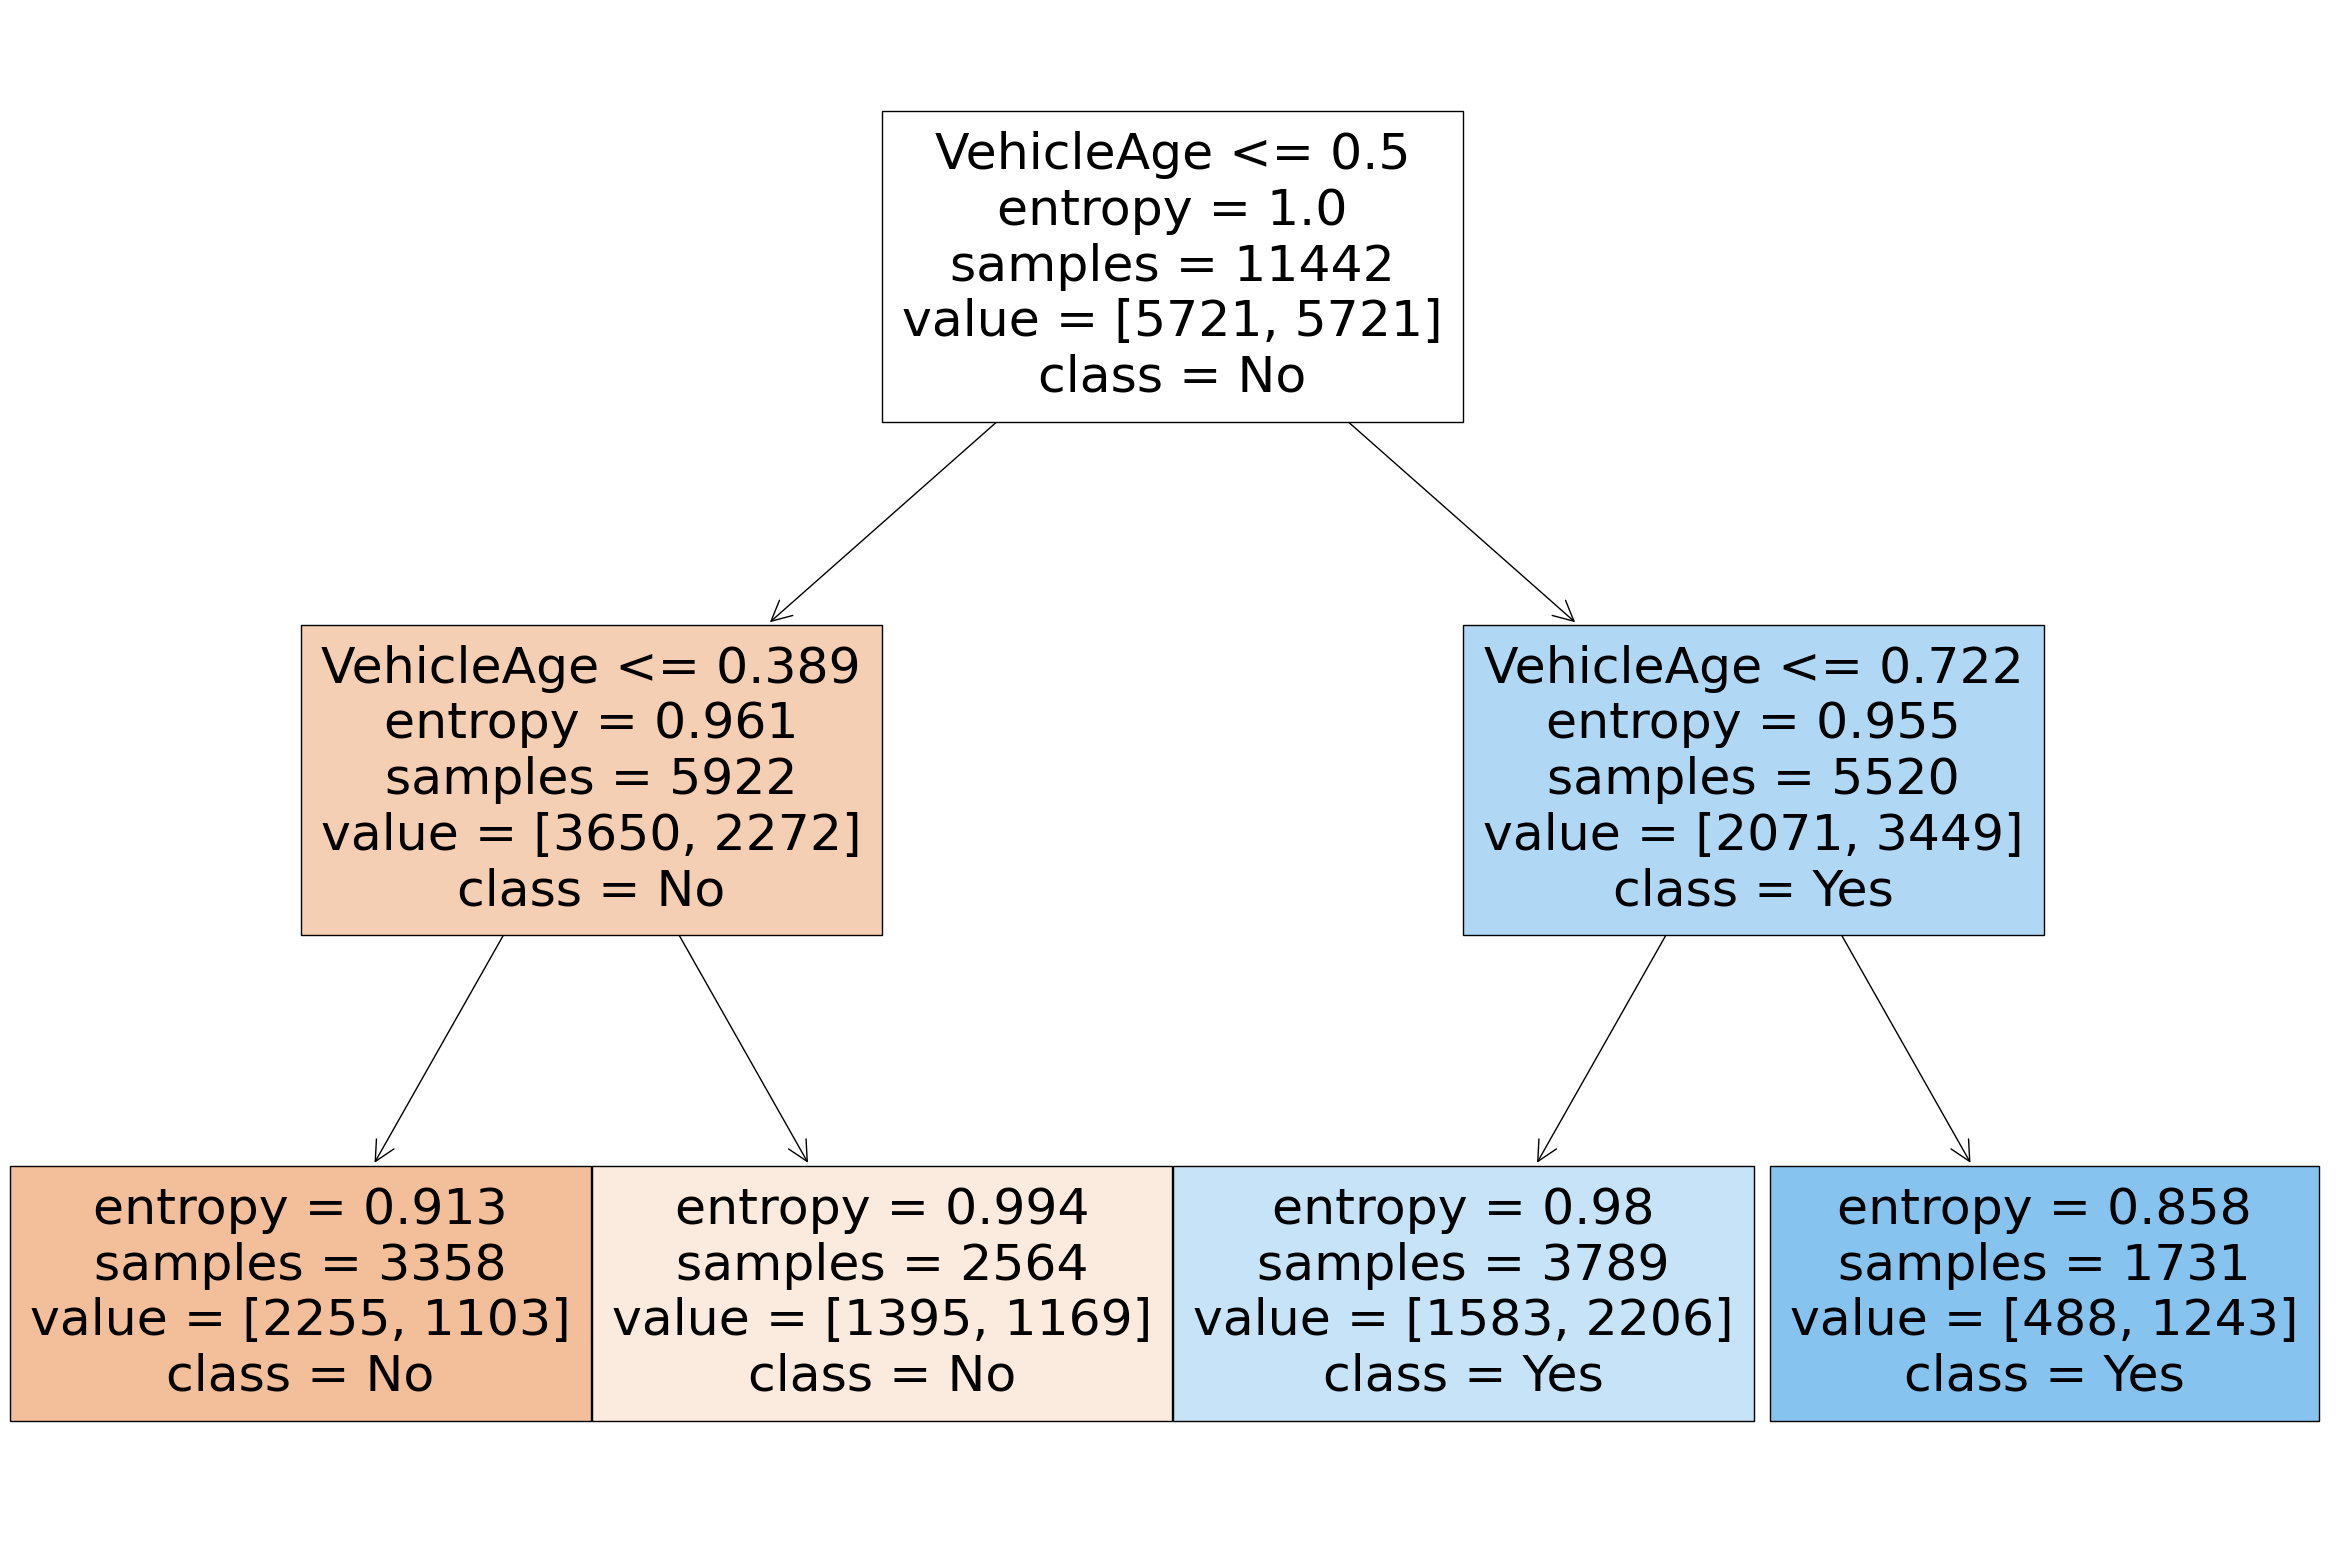

In [17]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model_tree1,
               feature_names=list(carAuction.columns)[1:],
               class_names=['No','Yes'],
               filled=True)

In [18]:
# Make predictions on training and testing data
prediction_on_train = model_tree1.predict(predictors_train)
prediction_on_test = model_tree1.predict(predictors_test)

In [19]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       0.62      0.64      0.63      5721
         Yes       0.62      0.60      0.61      5721

    accuracy                           0.62     11442
   macro avg       0.62      0.62      0.62     11442
weighted avg       0.62      0.62      0.62     11442



In [20]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.93      0.63      0.75      6027
         Yes       0.16      0.60      0.25       695

    accuracy                           0.63      6722
   macro avg       0.54      0.61      0.50      6722
weighted avg       0.85      0.63      0.70      6722



### Build a decision tree model with max_depth = 5

In [21]:
# Build a decision tree model on training data with max_depth = 5
model_tree2 = DecisionTreeClassifier(criterion = "entropy",random_state = 1, max_depth = 5)
model_tree2.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [22]:
# Make predictions on training and testing data
prediction_on_train = model_tree2.predict(predictors_train)
prediction_on_test = model_tree2.predict(predictors_test)

In [23]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       0.61      0.73      0.66      5721
         Yes       0.66      0.53      0.59      5721

    accuracy                           0.63     11442
   macro avg       0.63      0.63      0.63     11442
weighted avg       0.63      0.63      0.63     11442



In [24]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.93      0.71      0.81      6027
         Yes       0.17      0.52      0.26       695

    accuracy                           0.69      6722
   macro avg       0.55      0.62      0.53      6722
weighted avg       0.85      0.69      0.75      6722



### Build a decision tree model with max_depth = 30

In [25]:
# Build a decision tree model on training data with max_depth = 30
model_tree3 = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 30)
model_tree3.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=1)

In [26]:
# Make predictions on training and testing data
prediction_on_train = model_tree3.predict(predictors_train)
prediction_on_test = model_tree3.predict(predictors_test)

In [27]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train))

              precision    recall  f1-score   support

          No       0.99      0.99      0.99      5721
         Yes       0.99      0.99      0.99      5721

    accuracy                           0.99     11442
   macro avg       0.99      0.99      0.99     11442
weighted avg       0.99      0.99      0.99     11442



In [28]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.92      0.55      0.69      6027
         Yes       0.13      0.56      0.20       695

    accuracy                           0.55      6722
   macro avg       0.52      0.55      0.45      6722
weighted avg       0.83      0.55      0.64      6722



Q1. Which decision tree model has the best overall performance (based on f1-scores and overal accuracy)?<br>

The overall performance of Decision tree with 5 depth is best as it performs well on both test and train data with a f1 score of 0.63 and 0.69 accuracy. the decision tree with depth of 2 is bit less better with f1 score of 0.62 and 0.63. the decision tree with depth of depth 30 is least in overall performance as it has f1 score of 0.99 on training but only 0.55 on testing.

Q2. Describe the performance of the decision tree with max_depth = 30 on the train set. Despite almost perfect performance on the train set, why it is not working well on the test set?

When the decision tree is perfect in the training data because it becomes more and more specific with each step. due to the fitness in training set, it is not able to generalize itself for the test set. which results in overfitting the model on training det but cannot replicate the same on the test set.



Q3. What is your take on under-fiting, overfitting, and generalization? Which model underfits, which one overfit? Explain.

underfitting is when the model cannot help choose one, it cannot give us accurate result on which could be chosen to take a decision. overfitting is when the model gives us exact results and is able to generalize and be specific with each passing step. Generalization is when the model is able to fit to the data set. The model with depth of 2 is underfit and 30 is overfit. as the depth is 2 , it is not able to generalize enough to bring closer to purity. and for depth 30 it is overfitting because it reaches to alomst a stage where it is most pure in its form.

Q4. We have talked about the notion of overfitting in machine learning and deep learning, but we have examined it only for KNN and decision tree models. But how about naive Bayes? Can we be overfitting with naive Bayes? Explain your thoughts.

yes, we can be overfitting in Naive bayes if we are able to generalize it with the help of removing null values, remove the outliers, and preprocess the data. with the help of laplace smoothing, we can overfit a model with Naive bayes.

In [30]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Car_kicks3.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Car_kicks3.ipynb to html
[NbConvertApp] Writing 1088004 bytes to /content/drive/MyDrive/Car_kicks3.html
